<u><center><span style="font-family:Calisto; font-size:2.5em;">Exit Analysis</span></center></u>

<h2>Table of contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#intro">Introduction</a></li>
        <li><a href="#datacol">Data Collection</a></li>
        <li><a href="#eda">Explanatory Data Analysis</a></li>
        <li><a href="#Questions">Questions & Answers</a></li>
    </ol>
</div>
<br>
<hr>

## <u id ="intro">Introduction</u>    
<span style="font-family:Calisto; font-size:1.5em;"> In XYZ company, many employees leave each month. The stackholders want to know facts about employees who leave, so the recrutment will be ready and will keep an enough supply for hot jobs that employees leave it, this is on one hand. On the other hand, they want to know what rules have less lifespan more than others.
In this analysis, we will explore the date from the employees' service certificates.</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections as co
import re
import datetime
import win32com.client as win32
import os.path
import glob
import seaborn as sns
from IPython.display import display
plt.rcParams.update({'font.size': 14}) # setting plots font size for clarity
print("Imported Necessary libs")

Imported Necessary libs


# <u id = "datacol">DATA Collection process</u>
### A script was prepared to collect data from word file forms (Service Certificates) and gathers the data in excel file
### The information in the pink box were extracted for the prupose of this Analysis.

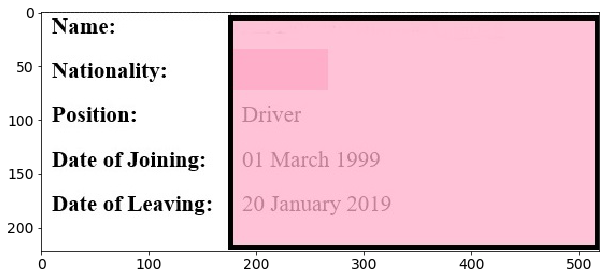

In [6]:
# the image of service certificate showing the extracted part from it
img_cert = plt.imread(r"D:\Work\2020\Data\service certificate.jpg")
plt.figure(figsize=(10,10))
plt.imshow(img_cert, aspect='equal')

### After Extracting the data, the data was cleaned and prepared for the Analysis.

In [7]:
def ext_info(Document):
    """Extract the employee information from the word documents
    
    Parameters: 
    document: the path of the word document
    
    Returns: a list includes employee information
    """
    word = win32.Dispatch("Word.Application")
    word.Visible = 0
    try:
        if os.path.isfile(Document):
            word.Documents.Open(Document)
            doc = word.ActiveDocument
            table = doc.Tables(1)
            no = table.Cell(Row =1, Column =1).Range.Text.split('\r')
            empno = no[0].split(r'/')
            empinfo = table.Cell(Row =2, Column =2).Range.Text.split('\r')
            empinfo.pop(-1)
            empinfo.append(empno[2])
            doc.Close()
    except:
        print("an Error occurrer in document:", Document)
    finally:   
        word.Quit   
        return empinfo

def file_list(txtfile):
    """Extract a list of file pathes stored in a text file
    
    Parameters: 
    txtfile: path of the text file
    
    Returns: a list of files
    """
    with open(txtfile, mode='r') as file:
            files = file.read()
    filelist = files.split('\n')
    return filelist

In [ ]:
# reading file contains all other files pathes
docx_list_files = r"D:\Work\2019\Data\cert files0.txt"
files = file_list(docx_list_files)

In [ ]:
# extracting information from word files and saving them in a list
files_values = []
x = 1
for file in files:
    doc = ext_info(file)
    files_values.append(doc)

In [ ]:
# converting the list to a dataframe and naming the columns
df_temp = pd.DataFrame(files_values, columns = ['leave','nat', 'job', 'join', 'empno', 'dept', 'service'])

In [ ]:
# saving the dataframe in excel file to read it directly next time
df_temp.to_excel('all_service_info_30.11.19.xlsx')

# <u id="eda">Explanatory Data Analysis</u>

In [8]:
# reading the data from the saved excel file
df_main = pd.read_excel('all_service_info_30.11.19.xlsx', index_col=[0], parse_Dates=True)

In [9]:
df_main.head()

,nat,job,join,empno,dept,service
leave,,,,,,
2019-09-01,Nepalese,Merchandiser,2017-10-15,2344,General Products Department,1.879452
2019-09-01,Indian,Van Salesman,2014-09-13,1927,Consumer Products Department,4.969863
2019-09-01,Nepalese,Warehouse Asst,2012-05-12,1587,Logistics Department,7.309589
2019-09-01,Sri-Lankan,Sales Supervisor,2006-12-16,1107,Consumer Electronics & Home Appliances Department,12.717808
2019-08-28,Nepalese,Driver,2006-11-30,1093,Logistics Department,12.750685


In [10]:
# delete employee number as we do not need it
df_main.drop(['empno'], axis=1, inplace=True)

In [11]:
# converting index to time series
df_main.index = pd.to_datetime(df_main.index)

# <u id="Questions">Questions & Answers</u>

# What are the minimum, maximum and average service period for employee?

In [12]:
# providing summary statisitcs for service period
df_main.describe()

,service
count,517.000000
mean,6.616942
std,6.319235
min,0.449315
25%,2.345205
50%,4.495890
75%,8.663014
max,39.057534


### <u>**Explaining the summary**</u>
* The number of records is **517** service certificate.  
* We can see that the average service period for employee is **6.6** years.  
* We can see that the standard deviation is **6.3** years > which is considered high and means that data includes wide range of values.  
* The minimum service period is **0.4** year which means 5 month.  
* The first quartile is **2.35** years.  
* The Second quartile - Median is **4.4** years.  
* The third quartile is **8.6** years.  
* The interquartile range (IQR) is 8.66 - 2.35 = **6.31** years.  
* The maximum service period is **39** years.

Text(6.616941787446015, 200, 'Average')

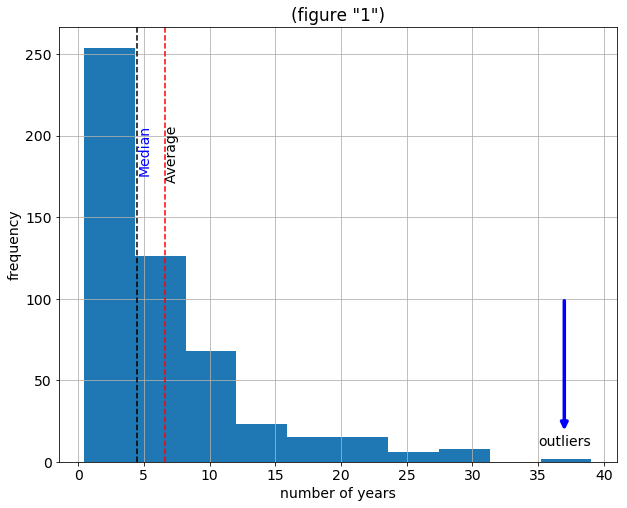

In [13]:
# plotting service period
plt.annotate("outliers",xy=(37, 100),ha='center', xytext=(37, 10), xycoords='data',arrowprops=dict(arrowstyle= '<|-',color='blue',lw=3.5,ls='-'))
df_main['service'].hist(bins=10,figsize=(10,8))
plt.xlabel('number of years')
plt.ylabel('frequency')
plt.title('(figure "1")')
plt.axvline(df_main['service'].median(), color='k', label='Median',linestyle='--')
plt.text(df_main['service'].median(),200,'Median',color='b', rotation=90)
plt.axvline(df_main['service'].mean(), color='r', label='Median',linestyle='--')
plt.text(df_main['service'].mean(),200,'Average',color='k',rotation=90)

### <u>explaining histogram (figure 1)</u>
* We notice that the sample has positive skewness.
* More than 250 employees did not compelete 5 years at least in the company
* we can see on the right side, there is a few number of employees they worked for more than 30 years, they are outliers.
#### As we have outliers, using The Average (mean) ~6.6~ will be misleading, it is better to use median **4.4** as a less misleading value for the average of service period for the employee

Text(0.5, 1.0, '(figure "2")')

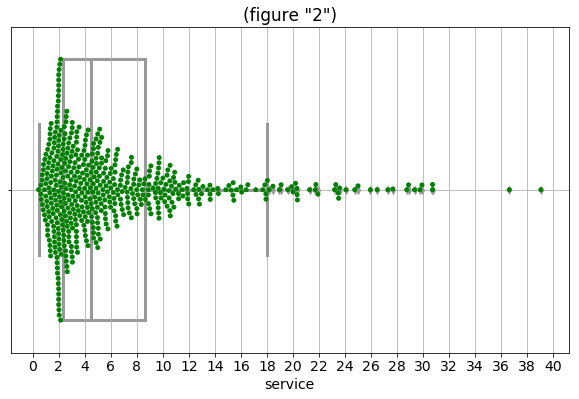

In [14]:
# applying box plot and sawrm plot to show the sample distrubtion
plt.figure(figsize=(10,6))
plt.xticks(np.arange(0, 41,2))
sns.boxplot(x='service', data=df_main,color='w', linewidth=3)
sns.swarmplot(x='service', data=df_main, color='green')
plt.grid()
plt.title('(figure "2")')

### <u>Explaining Box plot (figure 2)</u>
#### We notice that most of population is between 0.4 and 8.5 years.
#### Employees who spent more than 18 years are considered outliers (too far from the average employees).

# What are the nationalities that tend to leave the company more than the others?

,percentages,counts
Nepalese,44.487427,230
Indian,17.794971,92
Sri-Lankan,16.247582,84
Filipino,13.539652,70
Egyptian,2.127660,11
Kenyan,1.353965,7
Pakistani,0.967118,5
Jordanian,0.773694,4
Bangladeshi,0.773694,4
Tunisian,0.580271,3


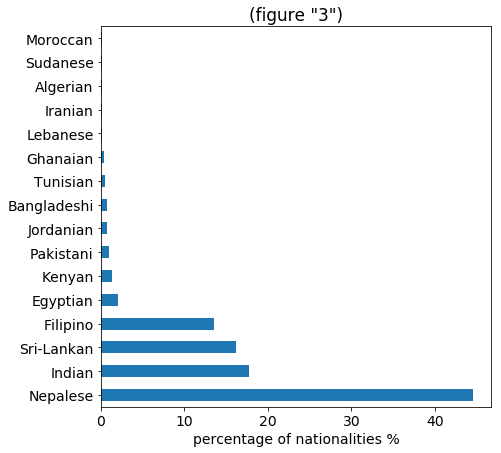

In [15]:
# calculating the nationalities percentages in the distribution
nat_count = pd.DataFrame({'percentages':df_main['nat'].value_counts() / len(df_main['nat']) * 100 , 'counts': df_main['nat'].value_counts()})
plt.figure(figsize=(7,7))
nat_count.percentages.plot(kind='barh')
plt.xlabel('percentage of nationalities %')
plt.title('(figure "3")')
nat_count

### <u>Nationalities column statistics (figure 3)</u>
#### We notice that the dominant nationalities of the sample are Nepalese, Indians, Sri-Lankans and Filipinos (As they represent the most of the company's population)

# What are the top 10 positions that they tend to leave the company more than others?

,percentages,counts
Merchandiser,23.017408,119
Driver,5.996132,31
Helper,5.802708,30
Sales Executive,5.415861,28
Technician,3.481625,18
Technician - Air Cons,2.127660,11
Senior Sales Executive,1.934236,10
Assistant Sales Executive,1.934236,10
Van Salesman,1.934236,10
Senior Technician,1.934236,10


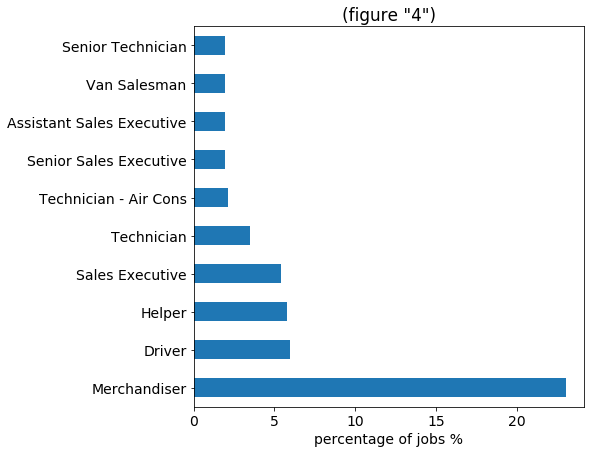

In [16]:
# calculating the nationalities percentages in the distribution
plt.figure(figsize=(7,7))
job_count = pd.DataFrame({'percentages':df_main['job'].value_counts() / len(df_main['job']) * 100 , 'counts': df_main['job'].value_counts()})
job_count['percentages'][0:10].plot(kind='barh')
plt.xlabel('percentage of jobs %')
plt.title('(figure "4")')
job_count.head(10)

### <u>Positions/jobs column statistics (figure 4)</u>
#### There are too many jobs, however we choose to show only the top 10 jobs in order to display them properly
#### We notice that most of percentage of the sample is Merchanidisers.
#### Knowing the hot jobs that they require recruting on fast pace will make the company always ready to face these changes without interrupting the workflow.

# What is the average number of people they are leaving each month/quarter/year?

In [17]:
# the average number of people that they leave each month
avg_per_month = df_main.loc['2015':'2019',['nat']].resample('M').count().mean().round()
avg_per_quarter = df_main.loc['2015':'2019',['nat']].resample('Q').count().mean().round()
avg_per_half_year = df_main.loc['2015':'2019',['nat']].resample('2Q').count().mean().round()
avg_anual = df_main.loc['2015':'2019',['nat']].resample('A').count().mean().round()
print("The expected amount of employees to leave per month are:",avg_per_month[0],'\nper Quarter:', avg_per_quarter[0], '\nper half year:',avg_per_half_year[0], '\nper year', avg_anual[0])

The expected amount of employees to leave per month are: 9.0 
per Quarter: 27.0 
per half year: 52.0 
per year 103.0


# General year-month Statistics

nat                                                                  \
leave     1     2     3    4     5    6     7     8     9    10    11    12   
leave                                                                         
2014    0.0   0.0   0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0   2.0   0.0   
2015    0.0   0.0   0.0  0.0   2.0  0.0   0.0   1.0  11.0   5.0   4.0   4.0   
2016    3.0   2.0   4.0  5.0   8.0  4.0   8.0   5.0   9.0   3.0   4.0  15.0   
2017   12.0  12.0  25.0  4.0  31.0  7.0  23.0  30.0   7.0  22.0  16.0  13.0   
2018   15.0  14.0   9.0  2.0   8.0  7.0   5.0  11.0   6.0  16.0   7.0  10.0   
2019   23.0   8.0  12.0  9.0  10.0  6.0   9.0   9.0  11.0   4.0   5.0   0.0   

      Total_per_year  
leave                 
leave                 
2014               2  
2015              27  
2016              70  
2017             202  
2018             110  
2019             106

Text(0.5, 1.0, '(figure "5")')

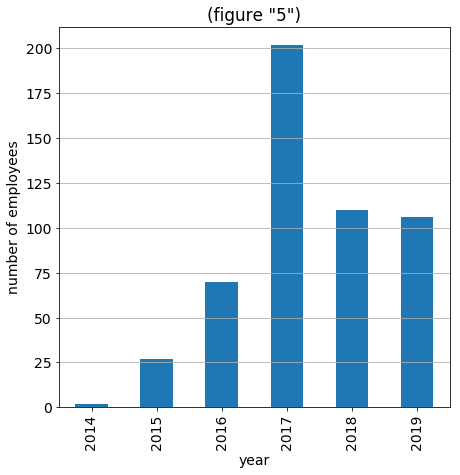

In [18]:
# counting how many people left each year
count_by_month = df_main[['nat']].pivot_table(index=df_main.index.year, columns=df_main.index.month, aggfunc='count')
display(count_by_month.assign(Total_per_year=df_main['nat'].groupby(df_main.index.year).count()).replace(np.nan,0))
plt.figure(figsize=(7,7))
df_main['nat'].groupby(df_main.index.year).count().plot(kind='bar')
plt.ylabel('number of employees')
plt.xlabel('year')
plt.grid(axis='y')
plt.title('(figure "5")')

### <u>Year statistics (figure 5)</u>
#### We notice from the table that 2014 the data is not complete and also in 2015.
#### The years that have the full data of all months are 2016, 2017, and 2018.
#### As this analysis were made by the end of Nov. 2019, December is not completed yet.
#### 2017 has the peak if we compared it to the other full years in 2016, 2018, which may indicate major incident or event affected the exit rate of employees.

Month over years,1,2,3,4,5,6,7,8,9,10,11,12
number of employees,53,36,50,20,59,24,45,56,44,50,38,42


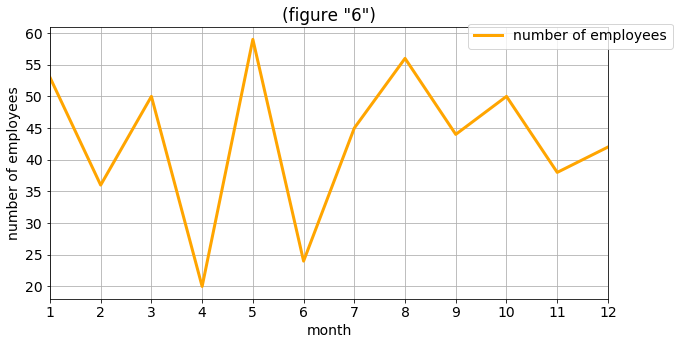

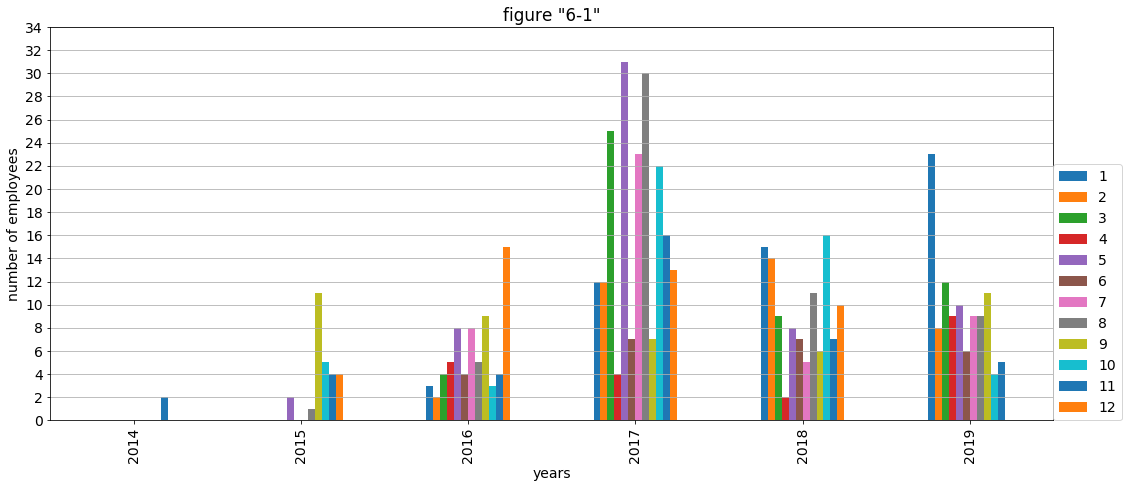

In [43]:

# calculating the total number of employees for all months over all years
month_count = pd.DataFrame(df_main['nat'].groupby(df_main.index.month).count())
month_count.index.name = 'Month over years'
month_count.columns = ['number of employees']
display(np.transpose(pd.DataFrame(month_count)))

# plotting all months over years
month_count.plot(kind='line', linewidth=3, color='orange', figsize=(10,5))
plt.xticks(range(1,13))
plt.ylabel('number of employees')
plt.xlabel('month')
plt.grid()
plt.title('(figure "6")')
plt.legend(loc=[0.75,0.92])
plt.show()

# comparing all months over the years
compare_month = count_by_month.replace(np.nan,0)
compare_month.columns = compare_month.columns.droplevel(level=0)
compare_month.plot(kind='bar', figsize=(15,7))
plt.title('figure "6-1"')
plt.xlabel('years')
plt.ylabel('number of employees')
plt.tight_layout()
plt.yticks(range(0,35,2))
plt.grid(axis='y')
plt.legend(loc=[1,0])
plt.show()

In [25]:
compare_month

leave,1,2,3,4,5,6,7,8,9,10,11,12
leave,,,,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2015,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,11.0,5.0,4.0,4.0
2016,3.0,2.0,4.0,5.0,8.0,4.0,8.0,5.0,9.0,3.0,4.0,15.0
2017,12.0,12.0,25.0,4.0,31.0,7.0,23.0,30.0,7.0,22.0,16.0,13.0
2018,15.0,14.0,9.0,2.0,8.0,7.0,5.0,11.0,6.0,16.0,7.0,10.0
2019,23.0,8.0,12.0,9.0,10.0,6.0,9.0,9.0,11.0,4.0,5.0,0.0


### <u>Month statistics (figure 6)</u>
#### We notice from the table that may is highest month at all, however it is highest in the peak year 2017 which affects the total.
#### Despite the fact that May is highest ever, in other years it is normal but we notice its always higher than April and June.
#### August had also higher rates in 2017 affected its performance in overall  
  
### <u>Month statistics (figure 6-1)</u>
#### providing a chart of all months in each year in order to compare them to each other

In [ ]:
# genrating code for filter
top10 = df_main['job'].value_counts().head(10)
t = ''
for i in top10.index:
    t+= '(df_main["job"] == "' + i +'") | '
t[:-2]

In [34]:
df_top10 = df_main[(df_main["job"] == "Merchandiser") | (df_main["job"] == "Driver") | (df_main["job"] == "Helper") | (df_main["job"] == "Sales Executive") | (df_main["job"] == "Technician") | (df_main["job"] == "Technician - Air Cons") | (df_main["job"] == "Van Salesman") | (df_main["job"] == "Assistant Sales Executive") | (df_main["job"] == "Senior Sales Executive") | (df_main["job"] == "Senior Technician")]

In [35]:
# grouping data by top 10 jobs and month to provide job counts
df_top10_percentages = df_top10.loc[:,['job']].groupby([df_top10.index.month, df_top10['job']]).count().unstack().replace(np.nan,0)
df_top10_percentages.index.name = 'month'

# we divide the result of each job on other data frame includes the job counts of all jobs 
# to find the maximum and minimum percentage for each job, that they are expected to leave each month
df_top10_percentages.columns = df_top10_percentages.columns.droplevel(level=0)
df_job_month = pd.DataFrame(df_main['job'].groupby(df_main.index.month).count())
df_top10_percentages_final = np.round(df_top10_percentages.div(df_job_month['job'], axis=0) *100, 2)

# creating minimum , mean and max of each column to append them to the end of the dataframe table
lst_min_job_perc, lst_mean_job_perc, lst_max_job_perc = [], [], []

for i in df_top10_percentages_final.columns:
    lst_min_job_perc.append(df_top10_percentages_final.loc[:,[i]].min()[0])
    lst_mean_job_perc.append(df_top10_percentages_final.loc[:,[i]].mean()[0])
    lst_max_job_perc.append(df_top10_percentages_final.loc[:,[i]].max()[0])

# concatenting the max, avg, mean list with df_top10_percentages_final dataframe
pd.concat([df_top10_percentages_final,pd.DataFrame([lst_min_job_perc,lst_mean_job_perc,lst_max_job_perc],index=['Minimum', 'Average', 'Maximum'], columns=df_top10_percentages.columns)], axis=0)

job,Assistant Sales Executive,Driver,Helper,Merchandiser,Sales Executive,Senior Sales Executive,Senior Technician,Technician,Technician - Air Cons,Van Salesman
1,0.0000,5.660,5.660000,22.6400,5.660000,5.660000,1.8900,0.0000,3.7700,1.890000
2,2.7800,0.000,2.780000,30.5600,5.560000,2.780000,0.0000,5.5600,2.7800,0.000000
3,2.0000,4.000,6.000000,24.0000,6.000000,4.000000,2.0000,0.0000,0.0000,2.000000
4,5.0000,10.000,5.000000,15.0000,20.000000,0.000000,0.0000,0.0000,0.0000,0.000000
5,6.7800,8.470,5.080000,20.3400,6.780000,0.000000,0.0000,5.0800,0.0000,3.390000
6,0.0000,12.500,0.000000,29.1700,4.170000,4.170000,0.0000,4.1700,4.1700,0.000000
7,0.0000,8.890,13.330000,15.5600,0.000000,0.000000,4.4400,0.0000,0.0000,0.000000
8,1.7900,7.140,1.790000,28.5700,1.790000,1.790000,0.0000,3.5700,1.7900,3.570000
9,0.0000,4.550,18.180000,20.4500,2.270000,0.000000,4.5500,4.5500,0.0000,4.550000
10,4.0000,8.000,4.000000,20.0000,6.000000,0.000000,6.0000,8.0000,6.0000,2.000000


## <u>Explaining table of top 10 jobs percentages</u>
- **The table shows the percentage of each job that left in each month over all the years.**
- **The minimum and maximum and average are the expected rate for each of these jobs to leave each month**  
#### for example if there is 100 employees leave the company per month, it is expected that the average around 23% of them will be Merchandisers and up to 34% or more of total number of employees will be Merchandisers.  
### <b>As we saw above the average employees they leave the company every month around 10 employees, we expect 2:3 or more to be Merchandisers.</b>

# What are the highest and lowest months?

In [44]:
# calculating highest and lowest month 
display('The lowest month',count_by_month[count_by_month == count_by_month.min().min()],'The highest month' ,count_by_month[count_by_month == count_by_month.max().max()])

'The lowest month'

nat                                             
leave  1   2   3   4   5   6   7    8   9   10  11  12
leave                                                 
2014  NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
2015  NaN NaN NaN NaN NaN NaN NaN  1.0 NaN NaN NaN NaN
2016  NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
2017  NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
2018  NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN
2019  NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN

'The highest month'

nat                                              
leave  1   2   3   4     5   6   7   8   9   10  11  12
leave                                                  
2014  NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN
2015  NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN
2016  NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN
2017  NaN NaN NaN NaN  31.0 NaN NaN NaN NaN NaN NaN NaN
2018  NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN
2019  NaN NaN NaN NaN   NaN NaN NaN NaN NaN NaN NaN NaN

#### We see that the lowest month is August 2015, this is because the employee was assigned the task of certificates prepration and the old certificates prepared upon request.
#### The maximum number was in May 2017.

# What is the higest department in employees left and what are the departments that they have less service periods?

,dept
Consumer Products Department,111
Logistics Department,102
Consumer Electronics & Home Appliances Department,70
Home Appliances Service Center,56
General Products Department,50
Office Equipment Service Center,38
Office Furniture & Furnishing Department,34
Office Equipment & Business Solutions Department,27
Finance Department,15
Human Resources & Administration Department,10


Text(0.5, 1.0, '(figure "7")')

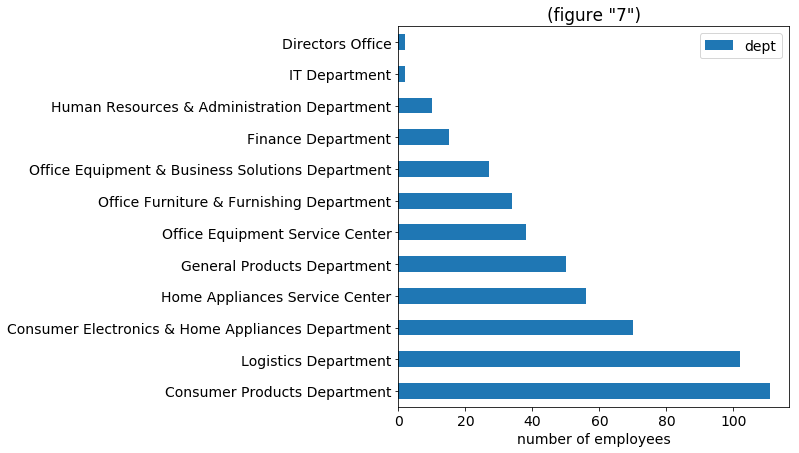

In [45]:
# calculating the service period per department
dept_count = df_main['dept'].value_counts()
display(pd.DataFrame(dept_count))
dept_count.plot(kind='barh', legend='dept', figsize=(7,7))
plt.xlabel('number of employees')
plt.title('(figure "7")')

#### We notice **(figure 7)** that Consumer Products department has the highest exit rate.
#### The lowest rate in Directors office and IT as the total number of employees in these departments are extremely low.
#### We notice also that HR and Finance Departments are stable and have less number of employees.

,service
dept,
Directors Office,11.636986
Finance Department,10.147580
Human Resources & Administration Department,9.830137
Home Appliances Service Center,9.733953
Office Equipment Service Center,7.514348
Office Furniture & Furnishing Department,7.296454
Logistics Department,6.725813
IT Department,5.669863
Consumer Electronics & Home Appliances Department,5.659765


Text(0.5, 1.0, '(figure "8")')

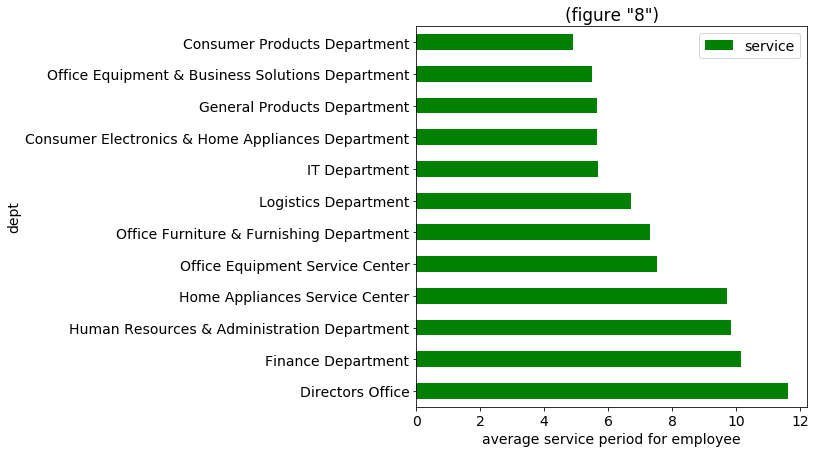

In [46]:
avg_service_per_dept = pd.DataFrame(df_main.groupby(['dept'])['service'].mean().sort_values(ascending=False))
display(avg_service_per_dept)
avg_service_per_dept.plot(kind='barh', color='green', figsize=(7,7))
plt.xlabel('average service period for employee')
plt.title('(figure "8")')

#### In last table and plot **(figure 8)**, if we excluded IT and Directors for their low numbers, we will find that Finance department has higher rates of employee service and stability and on the other hand Consumer Products Department is not stable and it has one of hot positions that requires continuous hiring.

# <b><u>Final Notes:</u></b>
## - The data were collected from word files.
## - All the service certificates were prepared at the times of the employee vacation were not in the dataset, another employee was assigned to prepare the Certificates. Thus, there is some missing data.
## - In order to improve the data and get more accurate results, it is better to acquire the data from the from the company system as it will be complete without any missing values.